In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
# Load the dataset
file_name = "3_RRP.xlsx"
df = pd.read_excel(file_name)

# Preprocess the data
X = df[['Precipitation', 'Airtemp']]  # Features
y = df['swe']  # Target

# Handle missing values
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:


# Define the model
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
fnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
fnn_history = fnn_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
fnn_loss = fnn_model.evaluate(X_test_scaled, y_test)
print("Feedforward Neural Network (FNN) MSE:", fnn_loss)


c:\Users\pkaur\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 3.2091
Feedforward Neural Network (FNN) MSE: 3.1216158866882324


In [20]:
y_pred= fnn_model.predict(X_test)

#Ensure y_test and y_pred are 1-dimensional arrays
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


<Axes: xlabel='Actual SWE', ylabel='Predicted SWE'>

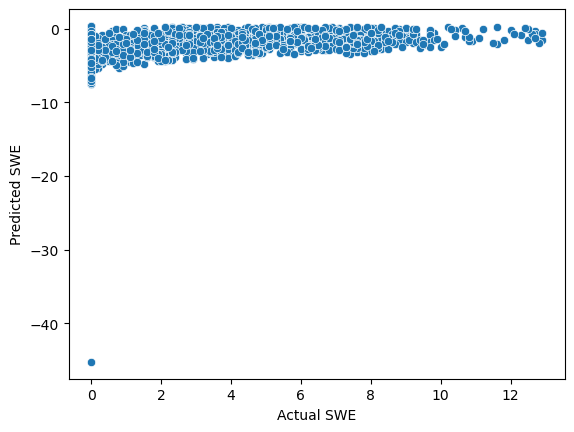

In [21]:
plot_data = pd.DataFrame({'Actual SWE': y_test_flat, 'Predicted SWE': y_pred_flat})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE')